# 데이터 불러오기

In [1]:
from eunjeon import Mecab

In [2]:
mecab = Mecab()

In [3]:
print(mecab.morphs('자연어처리는너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '는', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [4]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [5]:
path_to_file = './dataset/korean-english-park.train.ko'

In [6]:
with open(path_to_file, "r", encoding="UTF-8") as f:
    raw = f.read().splitlines()

In [7]:
print("Data Size", len(raw))
print("Example")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size 94123
Example
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [8]:
print(len(raw[3]))
print(type(raw))

90
<class 'list'>


In [9]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length
    
print('문장의 최단 길이 : ', min_len)
print('문장의 최장 길이 : ', max_len)
print('문장의 평균 길이 : ', sum_len//len(raw))

문장의 최단 길이 :  1
문장의 최장 길이 :  377
문장의 평균 길이 :  60


Text(0.5, 1.0, 'Sentence Length Distribution')

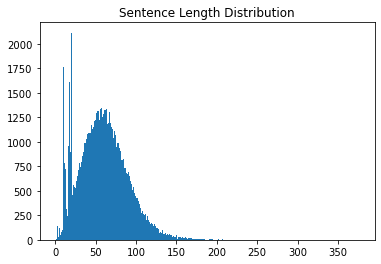

In [10]:
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1
    
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title('Sentence Length Distribution')

# 데이터 정제하기

#### 문장 길이가 1인것들은 노이즈일 가능성이 높음
따라서 제거해줘야 함

In [11]:
def check_sentence_with_length(raw, length):
    count = 0
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

In [12]:
check_sentence_with_length(raw, 1)

’


In [13]:
check_sentence_with_length(raw, 2)

1.
2.
3.
4.
면접
음식
햇빛
과일
양파
Q:
4.
6.
..


In [14]:
# 문장이 너무 긴것도 제거!

In [15]:
for idx, _sum in enumerate(sentence_length):
    if _sum > 1500:
        print("Outlier index: ", idx+1)

Outlier index:  11
Outlier index:  19
Outlier index:  21


In [16]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [17]:
# 중복된 문장 제거 ( 94123 → 77591)

In [18]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print("Data Size : ", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length
    
print("문장의 최단 길이 : ", min_len)
print("문장의 최장 길이 : ", max_len)
print("문장의 평균 길이 : ", sum_len//len(cleaned_corpus))

Data Size :  77591
문장의 최단 길이 :  1
문장의 최장 길이 :  377
문장의 평균 길이 :  64


In [19]:
check_sentence_with_length(cleaned_corpus, 11)

- 모르고 있습니다.
는 돌발질문을 했다.
하와이, 빅 아일랜드
tribunal 법정
외교통상부 이슬람교도
끌어내다, 철수시키다
pledge 서약하다
처음에는 장난이었다.
남한의 객관적 평가?
이전 보기 다음 보기
조금은 새침한 샬롯？
전유를 넣은 카페라떼
"사과할 것이 없다.
사업의) 합병, 합동
brisk 활기를 띤
지하철 타기 겁난다.
대통령 후보자의 지명
원문기사 원문기사보기
케냐 야생동물 고아원
더 내려야 하는 이유
천재 소녀의 '부활'
raft 다수, 다량
세 시간쯤 걸었을까?
시대가 변하고 있다.
우리는 운이 좋았다.
(아직 읽고있습니까?
건물 전체 무너져내려
levee 제방, 둑
미래 동맹 정책 구상
경유 1200원대로…
그 이유는 간단하다.
디즈니사만이 아니다.
폭탄테러가 공포 유발
고 소식통이 전했다.
키스를 잘 하는 방법
그녀의 아름다운 눈.
산 위를 나는 느낌.
resign 사퇴하다
제발 답변을 주세요!
의자는 비어 있었다.
작은 못이 아닙니다.
그는 "잘 모르겠다.
원화 강세 언제까지?
본서, 본부, 사령부
나는 크게 실망했다.
- 네, 보이는군요.
를 외치며 기뻐했다.
미래의 최첨단 사무실
정권을 잡다[장악하다
9. 몇 분간의 명상
hearing 청문회
라고 조던이 말했다.
Congress 의회
큰 파티는 아니지요.
로그인 Korea사전
비관적인, 염세주의의
이 일은 계속됩니다.
아기가 숨을 멈출 때
meantime 한편
좀 더 말씀해주시죠.
스피어스가 뚱뚱한가?
그들은 신중했습니다.
크라이슬러. 조업중단
standard 표준
대답은 다음과 같다.
(정당의) 원내 총무
이력서와 자기 소개서


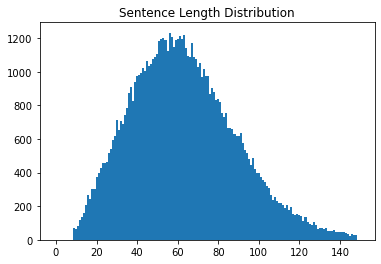

In [20]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1
    
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# Encoding(Tokenizer)

## 공백 기반 토큰화
padding 파라미터 : 'post', 'pre'

'나는 밥을 먹었다.'

→ \['나는', '밥을', '먹었다.'\]

In [21]:
def tokenize(corpus):
      import tensorflow as tf
      tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
      tokenizer.fit_on_texts(corpus)

      tensor = tokenizer.texts_to_sequences(corpus)
      tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="post")
      return tensor, tokenizer

In [22]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해보세요~

split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())
    
# split_tensor, split_tokenizer = tokenize(split_corpus)

In [23]:
split_corpus

[['베컴은',
  '13일',
  '입단식을',
  '치른',
  '뒤',
  '오는',
  '7월',
  '21일',
  '카슨에서',
  '열리는',
  '첼시와',
  'LA',
  '갤럭시의',
  '친선경기에',
  '출전한다.'],
 ['(음악:',
  '원래',
  '대통령이',
  '아닌',
  '한',
  '우표에',
  '얼굴을',
  '새기려면',
  '사후',
  '10년을',
  '기다려야',
  '했습니다.'],
 ['글래소우는',
  '영화‘하드',
  '데이즈',
  '나이트(원제:',
  'A',
  'Hard',
  "Day's",
  'Night',
  ')’와',
  '영화',
  '‘헬프(원제:'],
 ['결국', '출동한', '경찰과', '서커스', '단원들에', '의해', '동물들은', '집으로', '돌아왔다.'],
 ['7월의', '수치는', '작년', '같은', '시기의', '4억4,220만달러', '흑자보다', '감소한', '것이다.'],
 ['미국',
  '다른',
  '지역에서',
  '교회를',
  '가거나',
  '클럽을',
  '놀러',
  '갈',
  '때,',
  '이곳',
  '주민은',
  '장마기간이',
  '지속되는',
  '동안',
  '독한',
  '커피를',
  '마시며',
  '책을',
  '읽거나',
  '뜨개질을',
  '한다.'],
 ['훈센은',
  '입양한',
  '딸이',
  '가족으로부터',
  '유산을',
  '받지',
  '못하도록',
  '민사소송을',
  '제기할',
  '것이라고',
  '밝혔다.'],
 ['그는', '디스커버리', '채널의', "'인간", '대', '자연(Man', 'vs.'],
 ['지난',
  '4년',
  '동안',
  '약',
  '500개의',
  '미국',
  '기업들이',
  '값싼',
  '노동',
  '인건비',
  '때문에',
  '멕시코',
  '북부에',
  '그들의',
  '공장을',
  '세웠다.'],
 ['이', '회사'

In [24]:
split_tensor, split_tokenizer = tokenize(split_corpus)

In [25]:
print('Split Vocab Size : ', len(split_tokenizer.index_word))

Split Vocab Size :  237435


In [26]:
split_tensor, split_tokenizer = tokenize(filtered_corpus)
print('Split Vocab Size : ', len(split_tokenizer.index_word))

Split Vocab Size :  238086


In [27]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)
    
    if idx > 10 : break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


### 1번 인덱스 : 밝 + 혔다? // 밝+히다? / 밝 + 다?

한국에서 공백기반보다 의미론적 토큰화가 필요한 이유

## 형태소 토큰화

In [28]:
# mecab.morphs()

def mecab_split(sentence):
    
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [29]:
mecab_corpus

[['베컴',
  '은',
  '13',
  '일',
  '입단식',
  '을',
  '치른',
  '뒤',
  '오',
  '는',
  '7',
  '월',
  '21',
  '일',
  '카슨',
  '에서',
  '열리',
  '는',
  '첼시',
  '와',
  'LA',
  '갤럭시',
  '의',
  '친선',
  '경기',
  '에',
  '출전',
  '한다',
  '.'],
 ['(',
  '음악',
  ':',
  '원래',
  '대통령',
  '이',
  '아닌',
  '한',
  '우표',
  '에',
  '얼굴',
  '을',
  '새기',
  '려면',
  '사후',
  '10',
  '년',
  '을',
  '기다려야',
  '했',
  '습니다',
  '.'],
 ['글',
  '래',
  '소우',
  '는',
  '영화',
  '‘',
  '하드',
  '데이즈',
  '나이트',
  '(',
  '원제',
  ':',
  'A',
  'Hard',
  'Day',
  "'",
  's',
  'Night',
  ')',
  '’',
  '와',
  '영화',
  '‘',
  '헬프',
  '(',
  '원제',
  ':'],
 ['결국',
  '출동',
  '한',
  '경찰',
  '과',
  '서커스',
  '단원',
  '들',
  '에',
  '의해',
  '동물',
  '들',
  '은',
  '집',
  '으로',
  '돌아왔',
  '다',
  '.'],
 ['7',
  '월',
  '의',
  '수치',
  '는',
  '작년',
  '같',
  '은',
  '시기',
  '의',
  '4',
  '억',
  '4',
  ',',
  '220',
  '만',
  '달러',
  '흑자',
  '보다',
  '감소',
  '한',
  '것',
  '이',
  '다',
  '.'],
 ['미국',
  '다른',
  '지역',
  '에서',
  '교회',
  '를',
  '가',
  '거나',
  '클럽',
  '을'

In [30]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size : ", len(mecab_tokenizer.index_word))

MeCab Vocab Size :  51929


# Decoding (Detokenizer)

1. mecab_tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
2. mecab_tokenizer.index_word를 사용하여 Decoding


두 가지 방법을 사용하여 mecab_tensor[100]을 원문으로 되돌려 봅시다.
(단, 뛰어쓰기는 고려x)

In [53]:
# Case 1. 

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

교체 한 주택 가격 은 평균 15 만 달러 ( 약 1 억 8000 만 원 ) 정도 나가 며 부지 를 소유 하 면서 보험금 과 세금 을 납부 하 고 있 는 서민 들 을 위한 주택 이 다 .


In [55]:
# Case 2.

sentence = ""
for w in mecab_tensor[100]:
    if w == 0 : continue
    sentence +=  " " + mecab_tokenizer.index_word[w]
    
print(sentence.lstrip())


교체 한 주택 가격 은 평균 15 만 달러 ( 약 1 억 8000 만 원 ) 정도 나가 며 부지 를 소유 하 면서 보험금 과 세금 을 납부 하 고 있 는 서민 들 을 위한 주택 이 다 .
